<a href="https://colab.research.google.com/github/AlyAbdulloh/Machine-Learning-semester5/blob/main/Kuis1/Kuis1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 5:

---
1. Achmad Aly Abdulloh/02/2141720039
2. Aditya Kuncara Bakti/04/2041720231
3. Alfan Marcel Mulyawan/08/2141720266
4. M. Rohmatul Mauludi/17/2141720062
5. Muhammad Rifat Anwar/22/2141720006

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


NO 1


In [ ]:
label_counts = np.bincount(mnist.target.astype(int))

In [ ]:
for index, value in enumerate(label_counts):
    print(f'nilai {index} = {value}')

nilai 0 = 6903
nilai 1 = 7877
nilai 2 = 6990
nilai 3 = 7141
nilai 4 = 6824
nilai 5 = 6313
nilai 6 = 6876
nilai 7 = 7293
nilai 8 = 6825
nilai 9 = 6958


NO 2

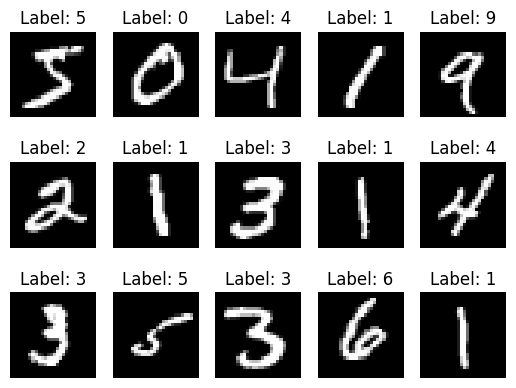

In [ ]:
images = mnist.data
labels = mnist.target.astype(int)

# Define the number of images you want to display
num_images_to_display = 15
# Display the first few images
for i in range(num_images_to_display):
    plt.subplot(3, 5, i + 1)
    image = images.iloc[i].values.reshape(28, 28)  # Reshape the image
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.show()

NO 3


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X=mnist.data.astype('float64')
y = mnist.target

# standarisasi data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / (std + 1e-8)


n_components = 50
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

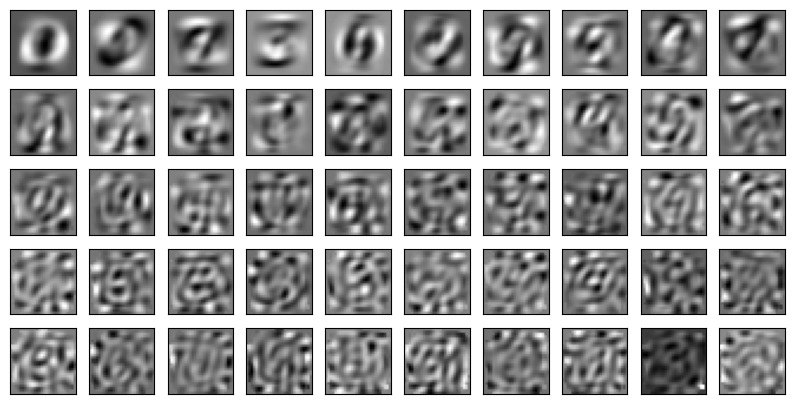

In [ ]:
fig, axes = plt.subplots(5, 10, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

NO 4


In [ ]:
X=mnist.data.astype('float64')
y = mnist.target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

NO 5

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# klasifikasi algoritma SVM
# Inisiasi SVM
svm = SVC(kernel='rbf', C=1.0)

# fit model
svm.fit(X_train, y_train)

# prediksi dengan data training
train_preds_svm = svm.predict(X_train)

# prediksi dengan data testing
test_preds_svm = svm.predict(X_test)


# klasifikasi algoritma Naive Bayes
# Inisiasi GaussianNB
nb = GaussianNB()

# fit model
nb.fit(X_train, y_train)

# prediksi dengan data training
train_preds_nb = nb.predict(X_train)

# prediksi dengan data testing
test_preds_nb = nb.predict(X_test)


NO 6


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

6. Algoritma SVM

In [ ]:
# evaluasi akurasi data train SVM
train_accuracy_svm = accuracy_score(y_train, train_preds_svm)
# evaluasi akurasi data test SVM
test_accuracy_svm = accuracy_score(y_test, test_preds_svm)

# classification report
train_report_svm = classification_report(y_train, train_preds_svm)
test_report_svm = classification_report(y_test, test_preds_svm)

print("Train Accuracy ", train_accuracy_svm)
print("Test Accuracy ", test_accuracy_svm)
print("Train Classification Report ")
print(train_report_svm)
print("Test Classification Report")
print(test_report_svm)

Train Accuracy  0.989204081632653
Test Accuracy  0.9762857142857143
Train Classification Report 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4845
           1       0.99      0.99      0.99      5513
           2       0.99      0.99      0.99      4857
           3       0.99      0.99      0.99      4965
           4       0.99      0.99      0.99      4888
           5       0.99      0.99      0.99      4398
           6       0.99      0.99      0.99      4788
           7       0.99      0.99      0.99      5045
           8       0.99      0.99      0.99      4833
           9       0.99      0.98      0.98      4868

    accuracy                           0.99     49000
   macro avg       0.99      0.99      0.99     49000
weighted avg       0.99      0.99      0.99     49000

Test Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
        

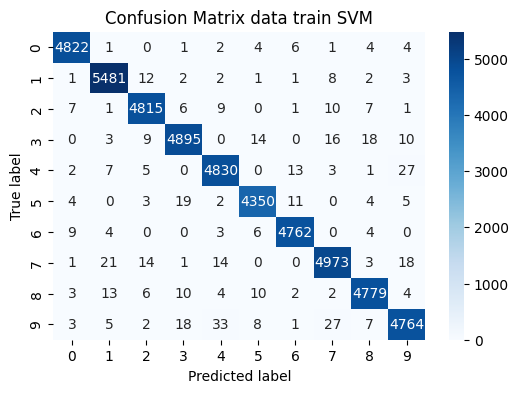

[[4822    1    0    1    2    4    6    1    4    4]
 [   1 5481   12    2    2    1    1    8    2    3]
 [   7    1 4815    6    9    0    1   10    7    1]
 [   0    3    9 4895    0   14    0   16   18   10]
 [   2    7    5    0 4830    0   13    3    1   27]
 [   4    0    3   19    2 4350   11    0    4    5]
 [   9    4    0    0    3    6 4762    0    4    0]
 [   1   21   14    1   14    0    0 4973    3   18]
 [   3   13    6   10    4   10    2    2 4779    4]
 [   3    5    2   18   33    8    1   27    7 4764]]


In [ ]:
# confusion matrix untuk data train svm
train_confusion_matrix_svm = confusion_matrix(y_train, train_preds_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data train SVM')
plt.show()
print(train_confusion_matrix_svm)

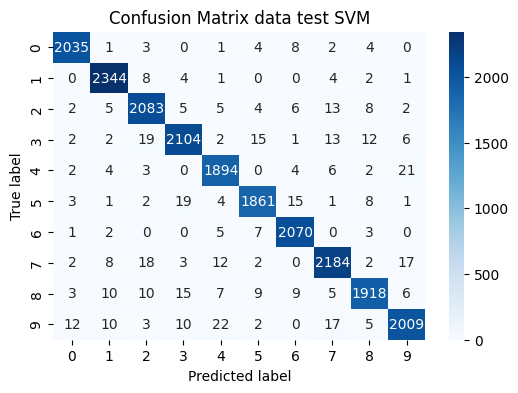

[[2035    1    3    0    1    4    8    2    4    0]
 [   0 2344    8    4    1    0    0    4    2    1]
 [   2    5 2083    5    5    4    6   13    8    2]
 [   2    2   19 2104    2   15    1   13   12    6]
 [   2    4    3    0 1894    0    4    6    2   21]
 [   3    1    2   19    4 1861   15    1    8    1]
 [   1    2    0    0    5    7 2070    0    3    0]
 [   2    8   18    3   12    2    0 2184    2   17]
 [   3   10   10   15    7    9    9    5 1918    6]
 [  12   10    3   10   22    2    0   17    5 2009]]


In [ ]:
# confusion matrix untuk data test svm
test_confusion_matrix_svm = confusion_matrix(y_test, test_preds_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data test SVM')
plt.show()
print(test_confusion_matrix_svm)

6. Algoritma Naive Bayess

In [ ]:
# evaluasi akurasi data train NB
train_accuracy_nb = accuracy_score(y_train, train_preds_nb)
# evalasi akurasi data test NB
test_accuracy_nb = accuracy_score(y_test, test_preds_nb)

# classification_report
train_report_nb = classification_report(y_train, train_preds_nb)
test_report_nb = classification_report(y_test, test_preds_nb)

print("Train Accuracy ", train_accuracy_nb)
print("Test Accuracy ", test_accuracy_nb)
print("Train Classification Report ")
print(train_report_nb)
print("Test Classification Report")
print(test_report_nb)

Train Accuracy  0.5514897959183673
Test Accuracy  0.550952380952381
Train Classification Report 
              precision    recall  f1-score   support

           0       0.66      0.93      0.77      4845
           1       0.78      0.94      0.86      5513
           2       0.87      0.31      0.45      4857
           3       0.77      0.34      0.47      4965
           4       0.84      0.12      0.21      4888
           5       0.61      0.04      0.07      4398
           6       0.61      0.95      0.74      4788
           7       0.90      0.29      0.44      5045
           8       0.31      0.58      0.40      4833
           9       0.37      0.95      0.53      4868

    accuracy                           0.55     49000
   macro avg       0.67      0.54      0.49     49000
weighted avg       0.68      0.55      0.50     49000

Test Classification Report
              precision    recall  f1-score   support

           0       0.64      0.92      0.75      2058
        

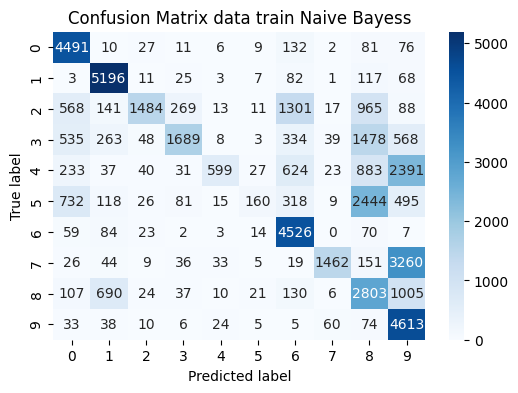

[[4491   10   27   11    6    9  132    2   81   76]
 [   3 5196   11   25    3    7   82    1  117   68]
 [ 568  141 1484  269   13   11 1301   17  965   88]
 [ 535  263   48 1689    8    3  334   39 1478  568]
 [ 233   37   40   31  599   27  624   23  883 2391]
 [ 732  118   26   81   15  160  318    9 2444  495]
 [  59   84   23    2    3   14 4526    0   70    7]
 [  26   44    9   36   33    5   19 1462  151 3260]
 [ 107  690   24   37   10   21  130    6 2803 1005]
 [  33   38   10    6   24    5    5   60   74 4613]]


In [ ]:
# confusion matrix untuk data train nb
train_confusion_matrix_nb = confusion_matrix(y_train, train_preds_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data train Naive Bayess')
plt.show()
print(train_confusion_matrix_nb)

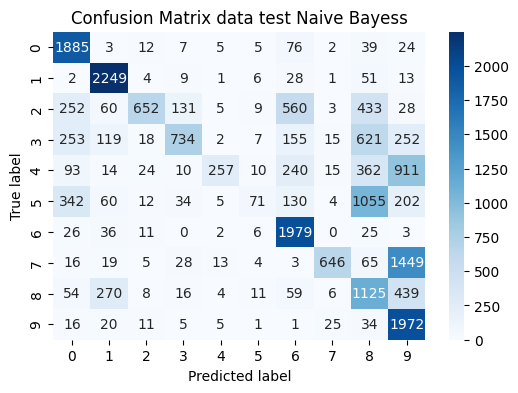

[[1885    3   12    7    5    5   76    2   39   24]
 [   2 2249    4    9    1    6   28    1   51   13]
 [ 252   60  652  131    5    9  560    3  433   28]
 [ 253  119   18  734    2    7  155   15  621  252]
 [  93   14   24   10  257   10  240   15  362  911]
 [ 342   60   12   34    5   71  130    4 1055  202]
 [  26   36   11    0    2    6 1979    0   25    3]
 [  16   19    5   28   13    4    3  646   65 1449]
 [  54  270    8   16    4   11   59    6 1125  439]
 [  16   20   11    5    5    1    1   25   34 1972]]


In [ ]:
# confusion matrix untuk data test nb
test_confusion_matrix_nb = confusion_matrix(y_test, test_preds_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data test Naive Bayess')
plt.show()
print(test_confusion_matrix_nb)

NO 7

In [ ]:
def show_images_with_predictions(model, X_test, y_test):
    predictions = model.predict(X_test)

    fig, axes = plt.subplots(3, 5, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_test.iloc[i]}\nPred: {predictions[i]}")
        ax.axis('off')
    plt.tight_layout()

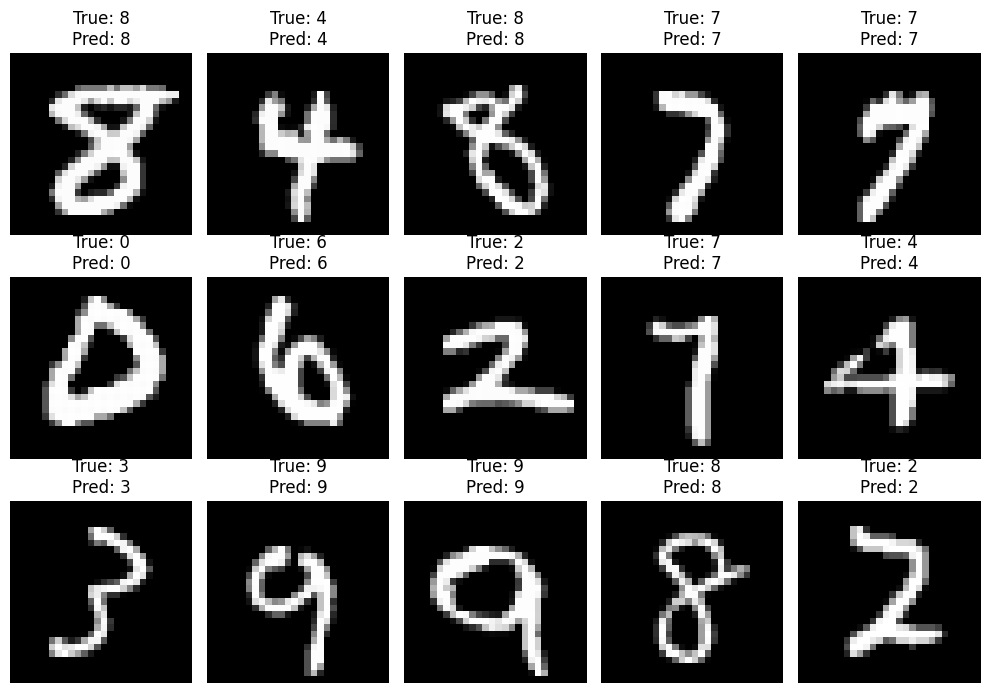

In [ ]:
# menampilkan citra data testing algoritma SVM
show_images_with_predictions(svm, X_test, y_test)

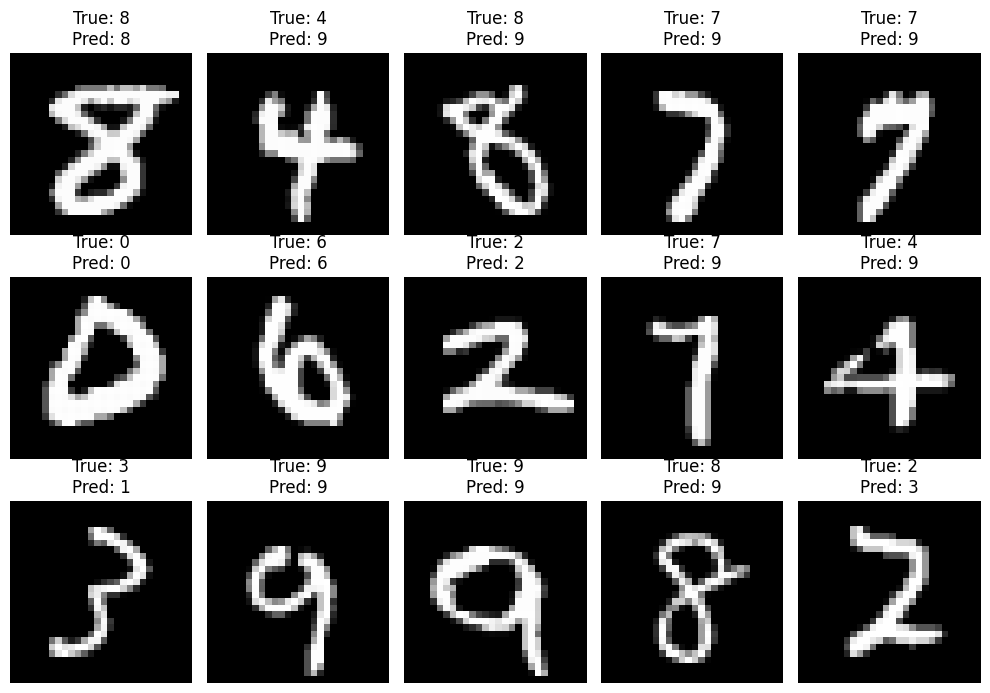

In [ ]:
# menampilkan citra data testing algoritma Naive Bayess
show_images_with_predictions(nb, X_test, y_test)

NO 8

In [ ]:
svm_accuracy = accuracy_score(y_test, test_preds_svm)
nb_accuracy = accuracy_score(y_test, test_preds_nb)

print(f'Akurasi SVM: {svm_accuracy * 100:.2f}%')
print(f'Akurasi Naive Bayes: {nb_accuracy * 100:.2f}%')

Akurasi SVM: 97.63%
Akurasi Naive Bayes: 55.10%
